<a href="https://colab.research.google.com/github/PMMaithBM11/Stocks_sentiment/blob/main/finBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install yfinance


In [18]:
!pip install transformers

In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [14]:
ticker = yf.Ticker("AAPL")


In [15]:
info = ticker.info
print("Detailed Information:")
for key, value in info.items():
   # format and indent the printed output
   print(f"{key}: {value}")
   print("-" * 10)


Detailed Information:
address1: One Apple Park Way
----------
city: Cupertino
----------
state: CA
----------
zip: 95014
----------
country: United States
----------
phone: 408 996 1010
----------
website: https://www.apple.com
----------
industry: Consumer Electronics
----------
industryKey: consumer-electronics
----------
industryDisp: Consumer Electronics
----------
sector: Technology
----------
sectorKey: technology
----------
sectorDisp: Technology
----------
longBusinessSummary: Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and dow

In [16]:
history = ticker.history(period="1mo")
print("\nHistorical Data:")
print(history)


Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2023-09-18 00:00:00-04:00  176.479996  179.380005  176.169998  177.970001   
2023-09-19 00:00:00-04:00  177.520004  179.630005  177.130005  179.070007   
2023-09-20 00:00:00-04:00  179.259995  179.699997  175.399994  175.490005   
2023-09-21 00:00:00-04:00  174.550003  176.300003  173.860001  173.929993   
2023-09-22 00:00:00-04:00  174.669998  177.080002  174.050003  174.789993   
2023-09-25 00:00:00-04:00  174.199997  176.970001  174.149994  176.080002   
2023-09-26 00:00:00-04:00  174.820007  175.199997  171.660004  171.960007   
2023-09-27 00:00:00-04:00  172.619995  173.039993  169.050003  170.429993   
2023-09-28 00:00:00-04:00  169.339996  172.029999  167.619995  170.690002   
2023-09-29 00:00:00-04:00  172.020004  173.070007  170.339996  171.210007   
2023-10-02 00:00:00-04:00  171.220001  174.300003  170.929

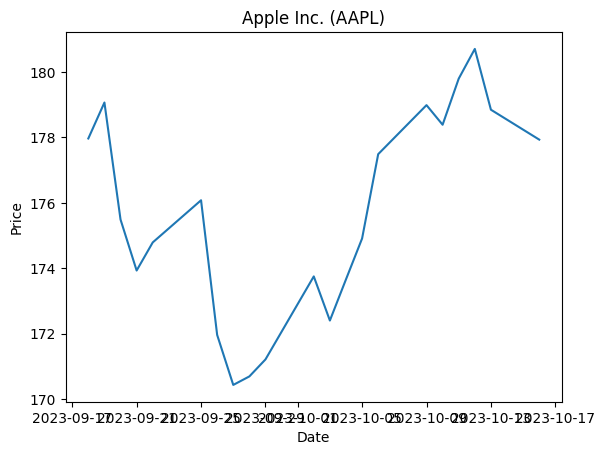

In [17]:
plt.plot(history.index, history["Close"])
plt.title(f"{info['shortName']} ({info['symbol']})")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


In [23]:
import re
import string

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespaces
    text = ' '.join(text.split())

    # You can add more text preprocessing steps here if needed

    return text

In [22]:
headlines = [
    "S&P 500 reaches record high on strong earnings reports",
    "Dow Jones Industrial Average dips amid inflation concerns",
    "Nasdaq Composite surges as tech stocks rebound",
    "FTSE 100 shows resilience in the face of Brexit uncertainty",
    "Hang Seng Index drops as trade tensions rise",
    "Japan's Nikkei 225 hits a 5-year high",
    "DAX 30 gains ground with positive economic data",
    "Sensex tumbles on global economic slowdown fears",
    "CAC 40 remains steady in a volatile market",
    "Russell 2000 small-cap stocks rally on economic optimism",
    "Shanghai Composite Index falls on regulatory concerns",
    "Australia's ASX 200 climbs as mining stocks rally",
    "Brazil's Bovespa Index reacts to political turmoil",
    "Mexico's IPC Index fluctuates on peso volatility",
    "KOSPI Index in South Korea surges on tech sector gains",
    "SSE 50 Index in China shows mixed performance",
    "TSEC Weighted Index in Taiwan reaches new heights",
    "Sensex and Nifty in India react to budget announcements",
    "EURO STOXX 50 remains stable in a turbulent market",
]

In [25]:
preprocessed_headlines = [preprocess_text(headline) for headline in headlines]
for idx, headline in enumerate(preprocessed_headlines):
    print(f"{idx+1}: {headline}")

1: sp 500 reaches record high on strong earnings reports
2: dow jones industrial average dips amid inflation concerns
3: nasdaq composite surges as tech stocks rebound
4: ftse 100 shows resilience in the face of brexit uncertainty
5: hang seng index drops as trade tensions rise
6: japans nikkei 225 hits a 5year high
7: dax 30 gains ground with positive economic data
8: sensex tumbles on global economic slowdown fears
9: cac 40 remains steady in a volatile market
10: russell 2000 smallcap stocks rally on economic optimism
11: shanghai composite index falls on regulatory concerns
12: australias asx 200 climbs as mining stocks rally
13: brazils bovespa index reacts to political turmoil
14: mexicos ipc index fluctuates on peso volatility
15: kospi index in south korea surges on tech sector gains
16: sse 50 index in china shows mixed performance
17: tsec weighted index in taiwan reaches new heights
18: sensex and nifty in india react to budget announcements
19: euro stoxx 50 remains stable 

In [26]:
inputs = tokenizer(preprocessed_headlines, padding = True, truncation = True, return_tensors='pt')
print(inputs)


{'input_ids': tensor([[  101, 11867,  3156,  6561,  2501,  2152,  2006,  2844, 16565,  4311,
           102,     0,     0,     0,     0,     0,     0],
        [  101, 23268,  3557,  3919,  2779, 16510,  2015, 13463, 14200,  5936,
           102,     0,     0,     0,     0,     0,     0],
        [  101, 17235,  2850,  4160, 12490, 12058,  2015,  2004,  6627, 15768,
         27755,   102,     0,     0,     0,     0,     0],
        [  101,  3027,  3366,  2531,  3065, 24501, 18622, 10127,  1999,  1996,
          2227,  1997,  7987, 10288,  4183, 12503,   102],
        [  101,  6865, 12411,  2290,  5950,  9010,  2004,  3119, 13136,  4125,
           102,     0,     0,     0,     0,     0,     0],
        [  101,  2900,  2015, 23205, 29501, 14993,  4978,  1037,  1019, 29100,
          2152,   102,     0,     0,     0,     0,     0],
        [  101, 27116,  2382, 12154,  2598,  2007,  3893,  3171,  2951,   102,
             0,     0,     0,     0,     0,     0,     0],
        [  101,  316

In [27]:
outputs = model(**inputs)
print(outputs.logits.shape)


torch.Size([19, 3])


In [28]:
import torch


predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)


tensor([[0.9247, 0.0289, 0.0464],
        [0.0137, 0.9559, 0.0304],
        [0.5630, 0.3613, 0.0758],
        [0.9407, 0.0277, 0.0316],
        [0.0104, 0.9638, 0.0258],
        [0.4974, 0.3315, 0.1711],
        [0.8492, 0.0870, 0.0638],
        [0.0159, 0.9490, 0.0351],
        [0.1999, 0.7510, 0.0491],
        [0.7639, 0.1981, 0.0379],
        [0.0098, 0.9570, 0.0332],
        [0.6393, 0.2841, 0.0766],
        [0.0508, 0.1004, 0.8489],
        [0.0125, 0.9378, 0.0498],
        [0.7097, 0.2011, 0.0892],
        [0.0371, 0.9227, 0.0402],
        [0.8716, 0.0300, 0.0984],
        [0.0731, 0.7294, 0.1975],
        [0.7891, 0.1637, 0.0472]], grad_fn=<SoftmaxBackward0>)


In [30]:
import pandas as pd


positive = predictions[:, 0].tolist()
negative = predictions[:, 1].tolist()
neutral = predictions[:, 2].tolist()


table = {'Headline':preprocessed_headlines,
         "Positive":positive,
         "Negative":negative,
         "Neutral":neutral}

df = pd.DataFrame(table, columns = ["Headline", "Positive", "Negative", "Neutral"])


df.head(5)


,Headline,Positive,Negative,Neutral
0,sp 500 reaches record high on strong earnings ...,0.924699,0.028921,0.046381
1,dow jones industrial average dips amid inflati...,0.013685,0.955914,0.030402
2,nasdaq composite surges as tech stocks rebound,0.562951,0.361257,0.075792
3,ftse 100 shows resilience in the face of brexi...,0.940744,0.027660,0.031596
4,hang seng index drops as trade tensions rise,0.010374,0.963849,0.025777
